For linear models for regression, the output, `ŷ`, is a linear function of the features: a
line, plane, or hyperplane (in higher dimensions). For linear models for classification,
the <b><i>decision boundary</i></b> is a linear function of the input. In other words, a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane.

The two most common linear classification algorithms are <b>logistic regression</b>, implemented in `linear_model.LogisticRegression`, and <b>linear support vector machines</b>
(linear SVMs), implemented in `svm.LinearSVC` (SVC stands for support vector classifier)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

### `LogisticRegression` and `LinearSVC` models to the `forge` dataset

C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


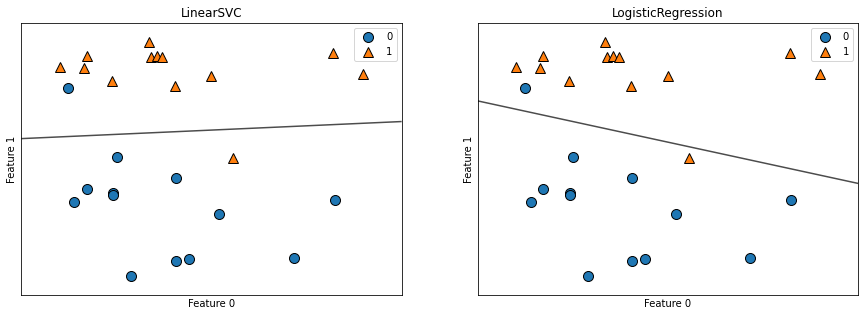

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
 ax.legend()
plt.show()

For `LogisticRegression` and `LinearSVC` the trade-off parameter that determines the
<u>strength of the regularization</u> is called `C`, and <b>higher values of `C` correspond to less regularization</b>. In other words, when you use a high value for the parameter `C`, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter `C`, the models put more emphasis on finding a coefficient
vector (`w`) that is close to zero.

There is another interesting aspect of how the parameter `C` acts. Using low values of `C`
will cause the algorithms to try to adjust to the “majority” of data points, while using
a higher value of `C` stresses the importance that each individual data point be classified correctly.

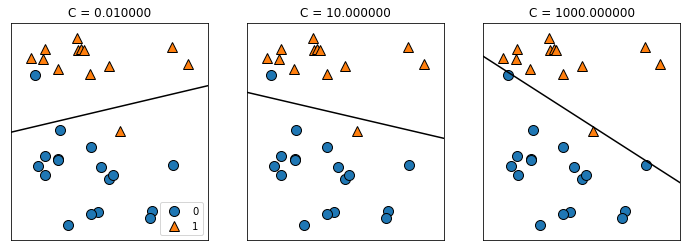

In [10]:
mglearn.plots.plot_linear_svc_regularization()

The model illustrated on the righthand side tries hard to correctly classify all
points, but might not capture the overall layout of the classes well. In other words,
this model is likely overfitting.

### `LogisticRegression` on the `breast-cancer` dataset

In [11]:
# Load the data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [12]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [15]:
cancer.data.shape

(569, 30)

In [16]:
cancer.target.shape

(569,)

In [17]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [19]:
type(cancer.target)

numpy.ndarray

In [20]:
targ_count = np.bincount(cancer.target)

In [21]:
targ_count

array([212, 357], dtype=int64)

In [22]:
np.unique(cancer.target)

array([0, 1])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [29]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(x_train,y_train)

C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
# Performance on training set and test set
print('Training set score:{:.3f}'.format(reg.score(x_train, y_train)))
print('Test set score:{:.3f}'.format(reg.score(x_test, y_test)))

Training set score:0.944
Test set score:0.958


The default value of `C=1` provides quite good performance, with almost 95% accuracy on
both the training and the test set. But as training and test set performance are very
close, it is likely that we are underfitting. 

In [34]:
# let's try with C=100
reg100 = LogisticRegression(C=100).fit(x_train, y_train)
print("Training set score: {:.3f}".format(reg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(reg100.score(x_test, y_test)))

Training set score: 0.958
Test set score: 0.951


C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
# let's try with C-0.01
reg001 = LogisticRegression(C=0.01).fit(x_train, y_train)
print("Training set score: {:.3f}".format(reg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(reg001.score(x_test, y_test)))

Training set score: 0.934
Test set score: 0.930


C:\users\shalu\desktop\project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
